# Exp2：基于回归分析的大学综合得分预测
---

## 一、案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

本任务中我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

## 二、作业说明
使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

**基本要求：**
* 按照 8:2 随机划分训练集测试集，用 RMSE 作为评价指标，得到测试集上线性回归模型的 RMSE 值；
* 对线性回归模型的系数进行分析。

**扩展要求：**
* 对数据进行观察与可视化，展示数据特点；
* 尝试其他的回归模型，对比效果；
* 尝试将离散的地区特征融入线性回归模型，并对结果进行对比。

**注意事项：**
* 基本输入特征有 8 个：`quality_of_education`, `alumni_employment`, `quality_of_faculty`, `publications`, `influence`, `citations`, `broad_impact`, `patents`；
* 预测目标为`score`；
* 可以使用 sklearn 等第三方库，不要求自己实现线性回归；
* 需要保留所有数据集生成、模型训练测试的代码；

## 三、数据概览

## 四、模型构建

### EDA

In [1]:
import pandas as pd 
import numpy as np 

csv_data = './cwurData.csv' # 数据路径
cwurData = pd.read_csv(csv_data, sep=',') # 读入csv文件为pandas的DataFrame
cwurData_1 = cwurData.copy()

cwurData = cwurData.dropna()  # 舍去包含 NaN 的 row
len(cwurData)

feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']

cwurData.head(1).T

,200
world_rank,1
institution,Harvard University
region,USA
national_rank,1
quality_of_education,1
alumni_employment,1
quality_of_faculty,1
publications,1
influence,1
citations,1


In [2]:
cwurData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 200 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2000 non-null   int64  
 1   institution           2000 non-null   object 
 2   region                2000 non-null   object 
 3   national_rank         2000 non-null   int64  
 4   quality_of_education  2000 non-null   int64  
 5   alumni_employment     2000 non-null   int64  
 6   quality_of_faculty    2000 non-null   int64  
 7   publications          2000 non-null   int64  
 8   influence             2000 non-null   int64  
 9   citations             2000 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2000 non-null   int64  
 12  score                 2000 non-null   float64
 13  year                  2000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 234.4+ KB


In [3]:
cwurData.year.unique()

array([2014, 2015], dtype=int64)

#### Worldcloud

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


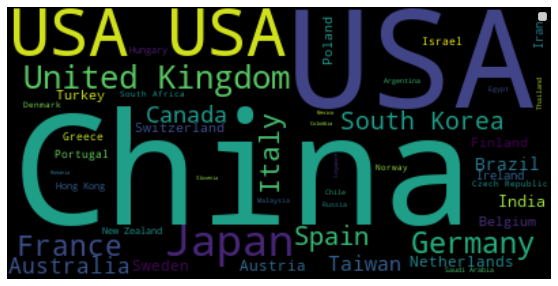

In [4]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

dataframe = cwurData['region'].to_string()

text = dataframe

wordcloud = WordCloud().generate(text)

f,ax = plt.subplots(1,1,figsize=(25,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.legend()
plt.show()

wordcloud.to_file('cwurDatawordcloud.jpg')

#### Visualization

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style('whitegrid')

In [6]:
df_2012_x = cwurData_1.loc[(cwurData_1['year'] == 2012)]
df_2012_y = df_2012_x['region'].value_counts()

df_2013_x = cwurData_1.loc[(cwurData_1['year'] == 2013)]
df_2013_y = df_2013_x['region'].value_counts()

df_2014_x = cwurData_1.loc[(cwurData_1['year'] == 2014)]
df_2014_y = df_2014_x['region'].value_counts()

df_2015_x = cwurData_1.loc[(cwurData_1['year'] == 2015)]
df_2015_y = df_2015_x['region'].value_counts()

x_2012 = list(df_2012_x['region'].unique())
x_2013 = list(df_2013_x['region'].unique())
x_2014 = list(df_2014_x['region'].unique())
x_2015 = list(df_2015_x['region'].unique())

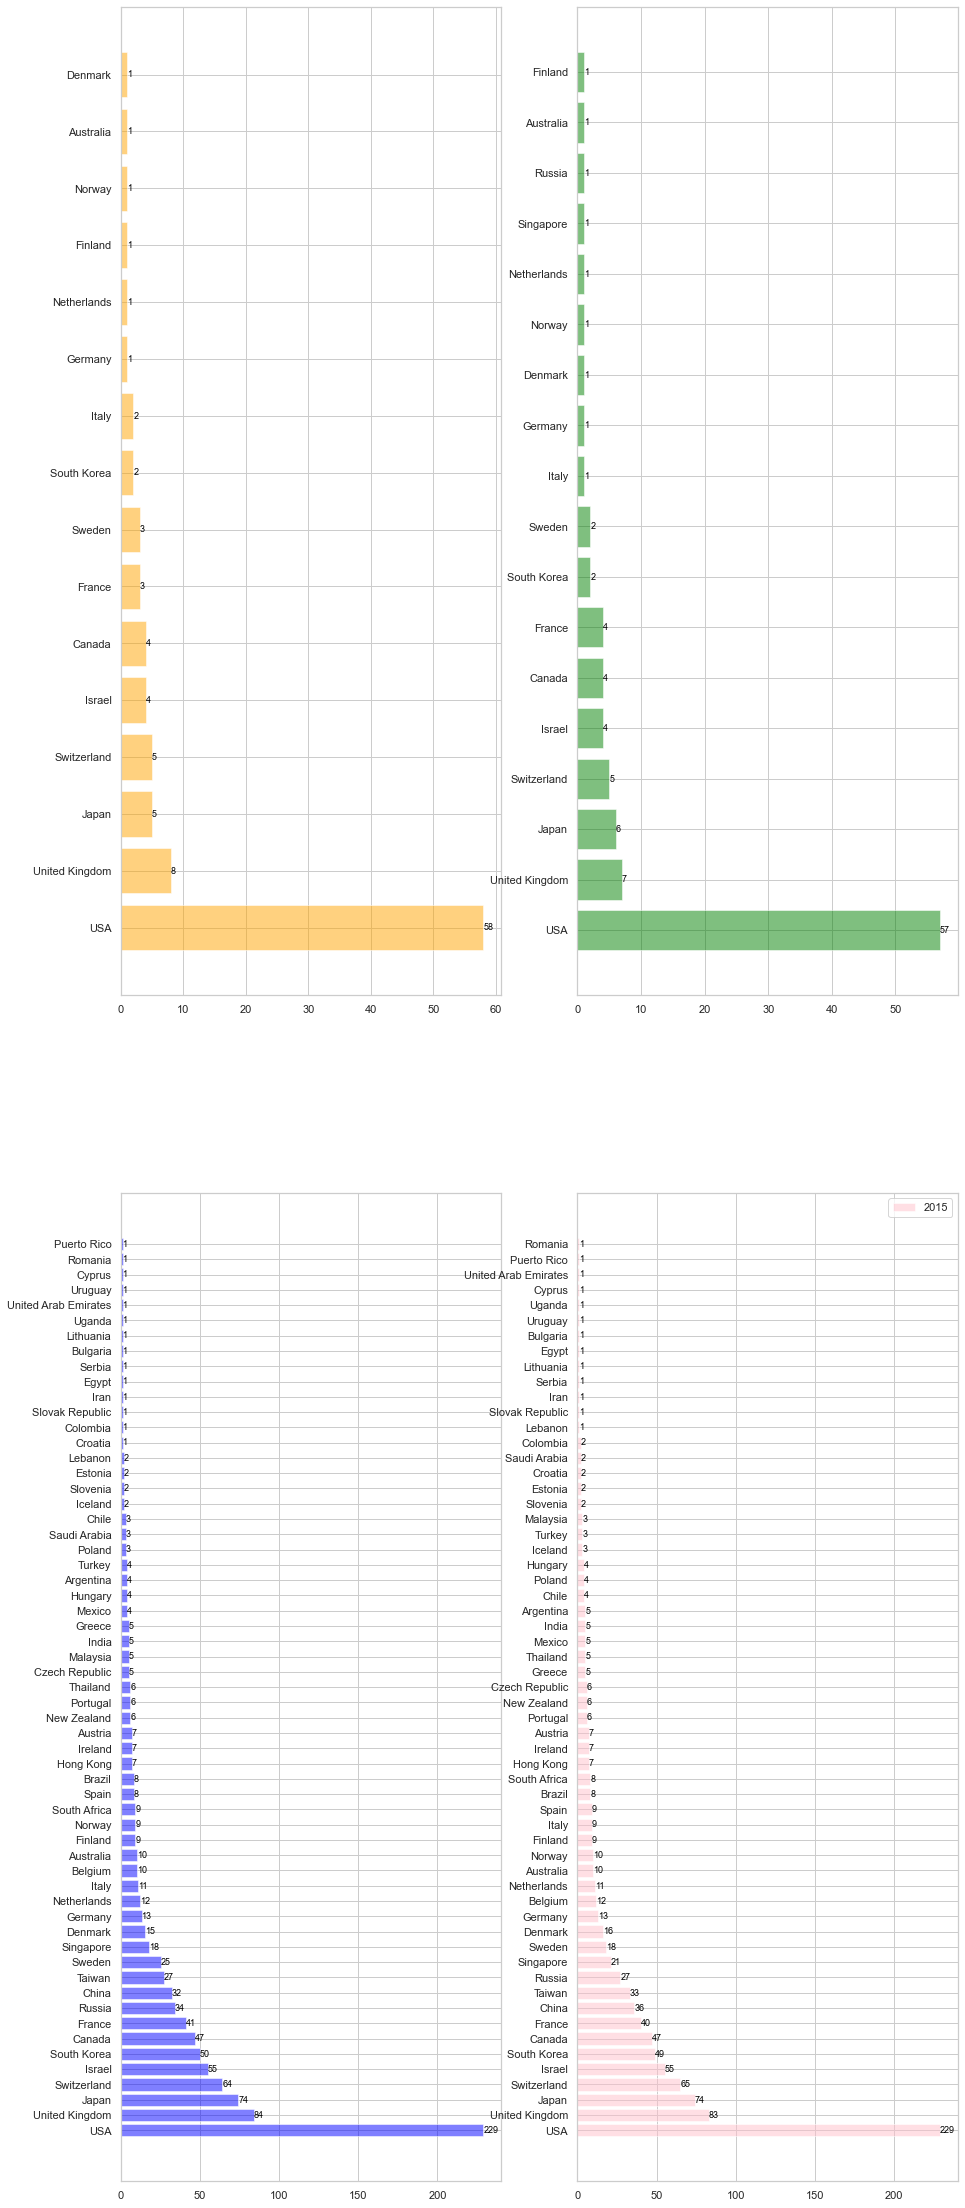

In [29]:
fig = plt.figure(figsize = (15 , 40))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.barh(x_2012 , df_2012_y , alpha = 0.5 , color = 'orange' , label = '2012')
ax2.barh(x_2013 , df_2013_y , alpha = 0.5 , color = 'green' , label = '2013')
ax3.barh(x_2014 , df_2014_y , alpha = 0.5 , color = 'blue', label = '2014')
ax4.barh(x_2015 , df_2015_y , alpha = 0.5 , color = 'pink', label = '2015')

for a, b in zip(df_2012_y, x_2012):
	ax1.text(a, b , a, ha='left', va='center', fontsize = 9 ,color = 'black')
for a, b in zip(df_2013_y, x_2013):
	ax2.text(a, b , a, ha='left', va='center', fontsize = 9 ,color = 'black')
for a, b in zip(df_2014_y, x_2014):
	ax3.text(a, b , a, ha='left', va='center', fontsize = 9 ,color = 'black')
for a, b in zip(df_2015_y, x_2015):
	ax4.text(a, b , a, ha='left', va='center', fontsize = 9 ,color = 'black')
    
#ax1.text(5 , 16 , 'prestigious universities by country in 2012' , size = 18)
#ax2.text(5 , 18.05 , 'prestigious universities by country in 2013' , size = 18)
#ax3.text(5 , 60 , 'prestigious universities by country in 2014' , size = 18)
#ax4.text(15 , 60 , 'prestigious universities by country in 2015' , size = 18)

plt.legend()
plt.show()

<AxesSubplot:xlabel='institution', ylabel='score'>

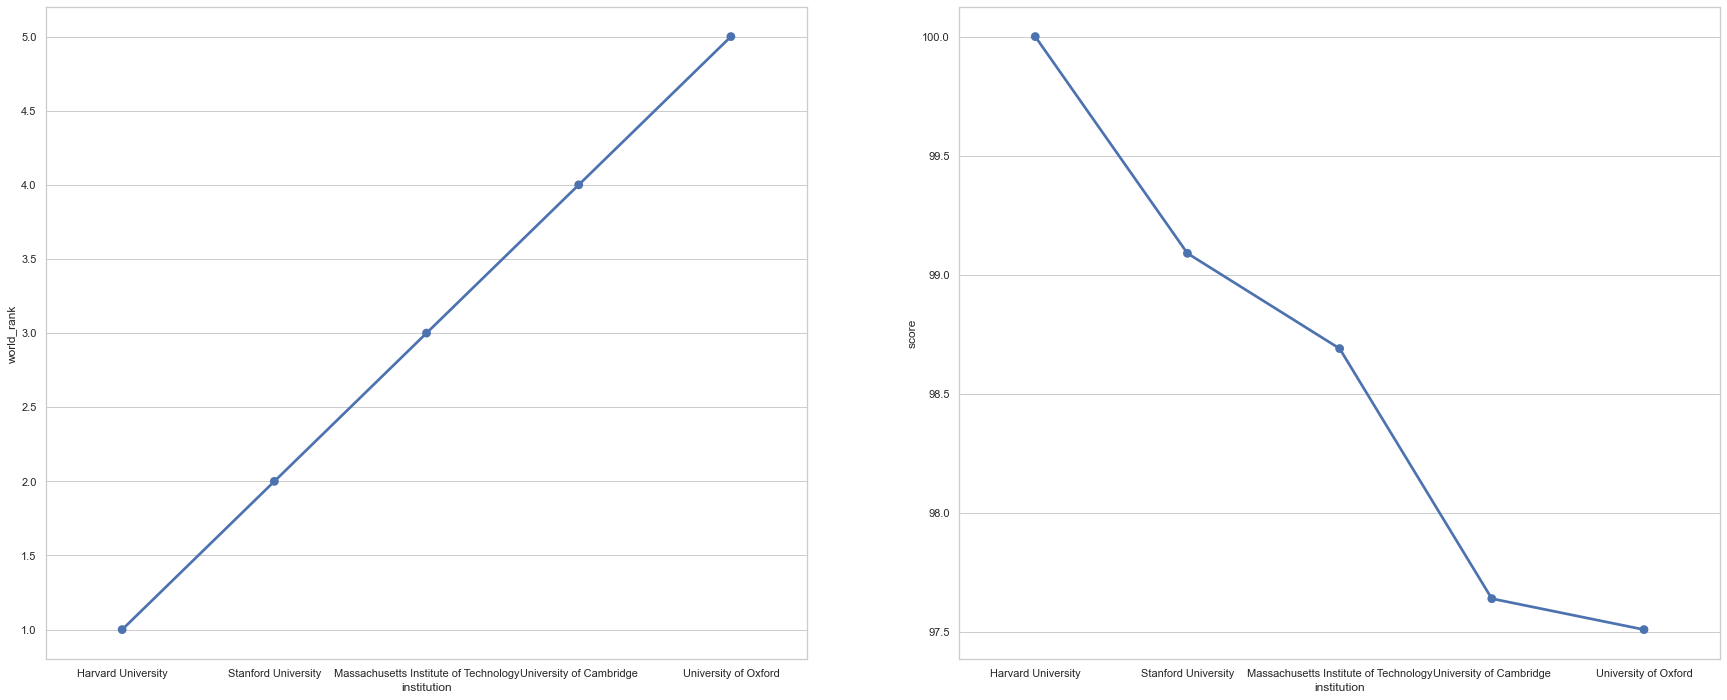

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style('whitegrid')

fig, axs = plt.subplots(ncols = 2 , figsize=(30,12))
sns.pointplot(data=cwurData.head(5), x='institution', y='world_rank',ax = axs[0]  ,fontsize = 100)
sns.pointplot(data=cwurData.head(5), x='institution', y='score',ax = axs[1])

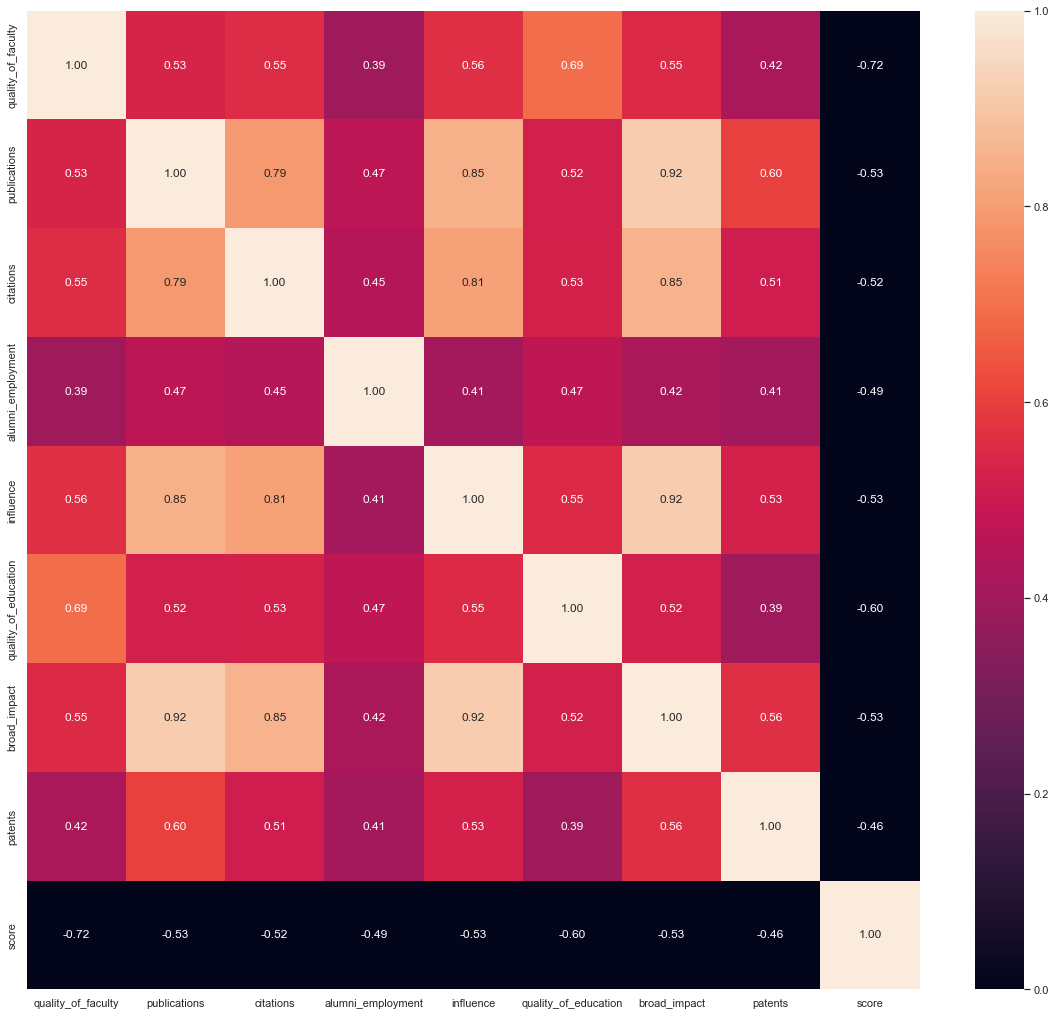

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style('whitegrid')


feature_cols_1 = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents' , 'score']

plt.figure(figsize=(20, 18))
sns.heatmap(cwurData[feature_cols_1].corr(), 
            #cmap = 'YlGnBu', 
            annot = True, 
            fmt = '.2f', 
            vmin = 0)

plt.show()

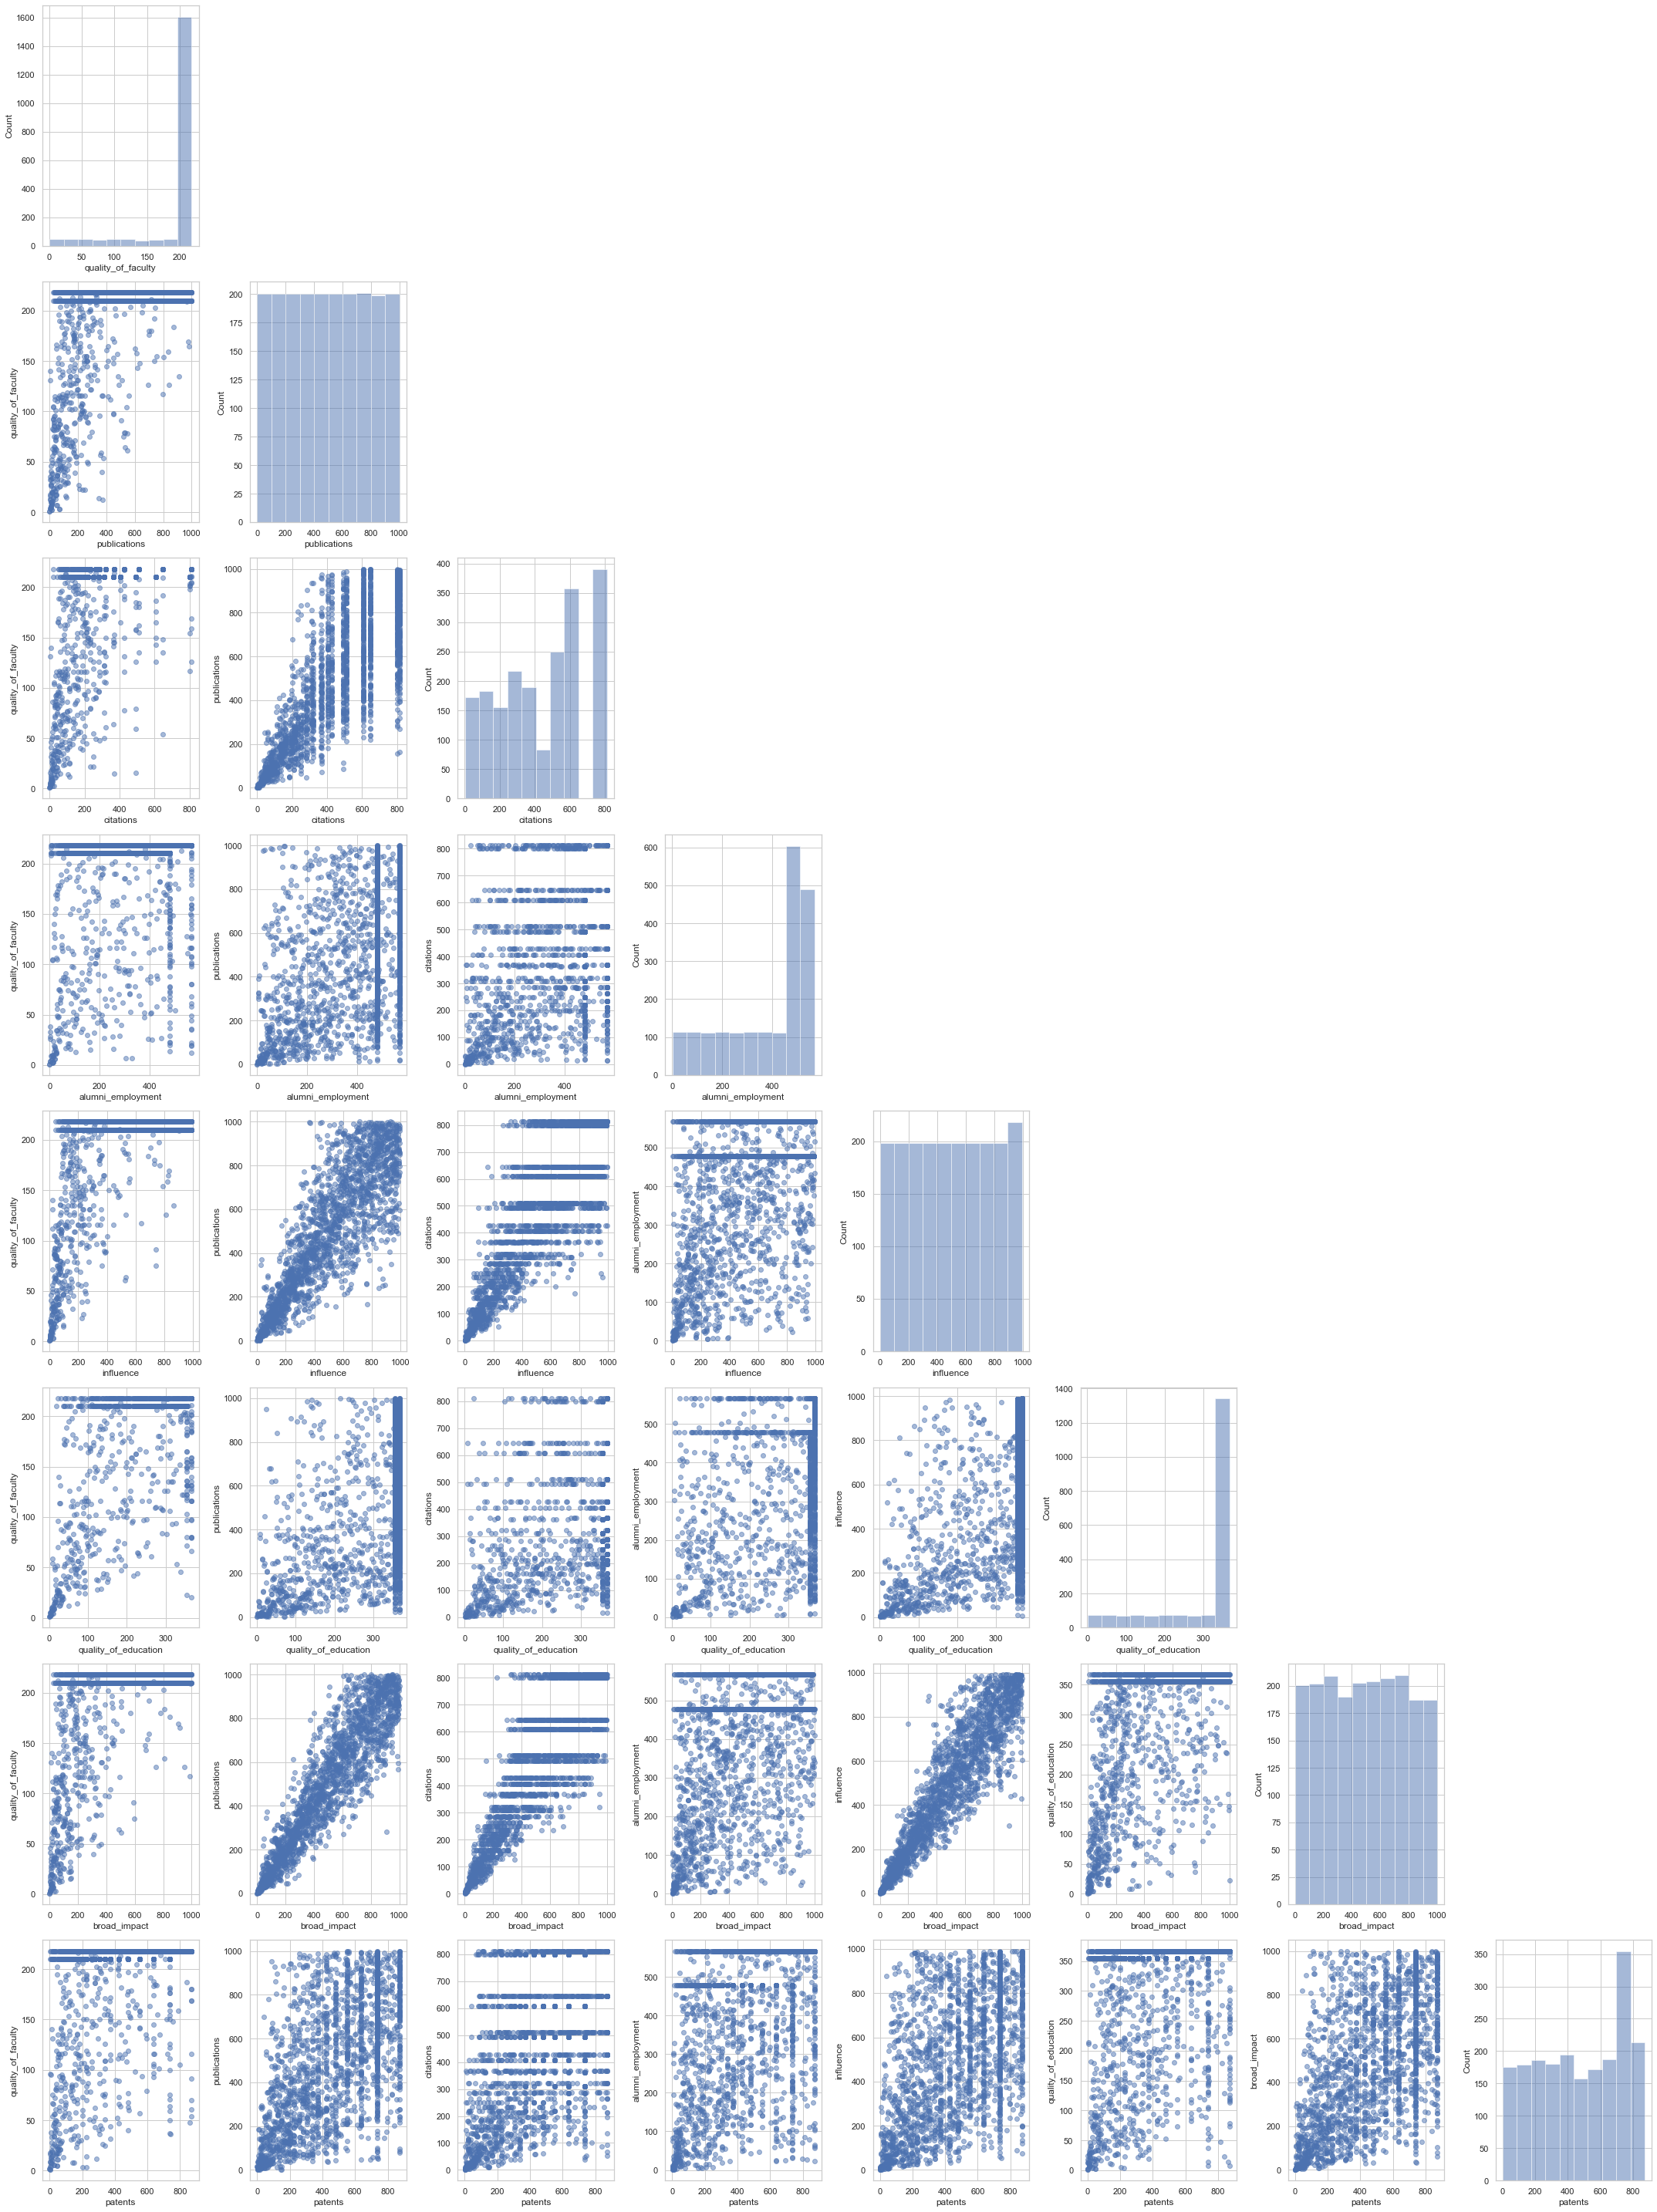

In [10]:
import matplotlib.pyplot as plt 
from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(cwurData[feature_cols].values , figsize = (30 , 40) , names = feature_cols , alpha = 0.5)

plt.tight_layout()
plt.show()

### Model Training

#### LinearRegression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.pipeline import make_pipeline

df = cwurData.copy()
df = df.dropna()

X = df[feature_cols]
y = df['score']

X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.8 , random_state = 0)

LR = LinearRegression()
LR.fit(X_train , y_train)

y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

print('LR.coef_ : {}'.format(LR.coef_))
print('LR.intercept_ : {}'.format(LR.intercept_))

print('-----------------------------------------------')

RMSE_train = np.sqrt(mean_squared_error(y_train , y_train_pred))
print('LR Train RMSE : {}'.format(RMSE_train))

R2_train = r2_score(y_train , y_train_pred)
print('LR Train R^2 : {}'.format(R2_train))

RMSE_test = np.sqrt(mean_squared_error(y_test , y_test_pred))
print('LR Test RMSE : {}'.format(RMSE_test))

R2_test = r2_score(y_test , y_test_pred)
print('LR Test R^2 : {}'.format(R2_test))

MAE = mean_absolute_error(y_test , y_test_pred)
print('LR MAE : {}'.format(MAE))

LR.coef_ : [-0.06098747  0.00043304 -0.00014505 -0.00676624  0.00023876 -0.00579273
 -0.00229295 -0.00248125]
LR.intercept_ : 65.06030557604531
-----------------------------------------------
LR Train RMSE : 4.077806764013158
LR Train R^2 : 0.5877618275489858
LR Test RMSE : 4.739097042663064
LR Test R^2 : 0.5951639000362217
LR MAE : 2.181356978042239


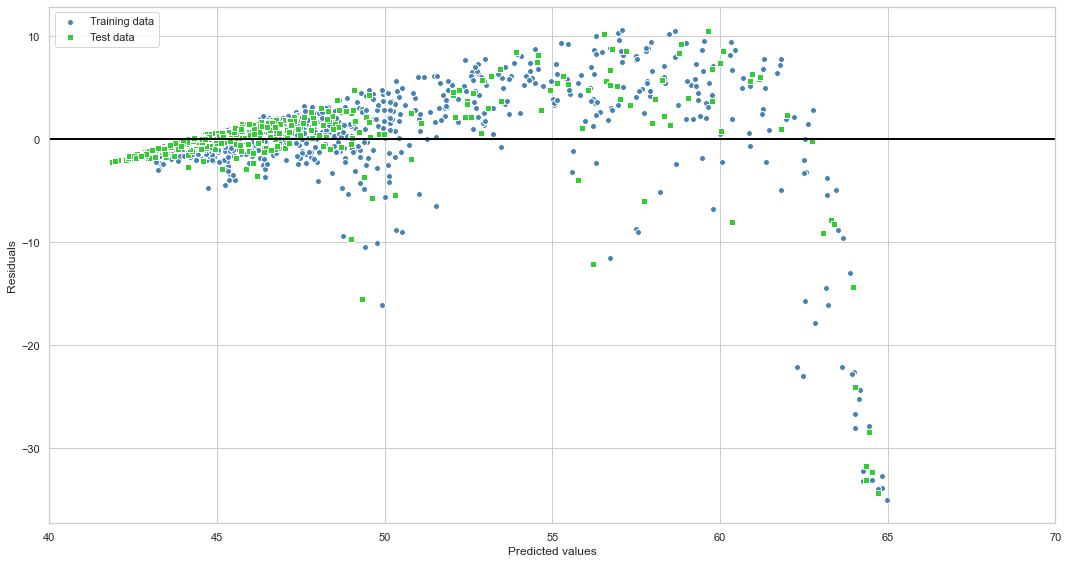

In [12]:
plt.figure(figsize = (15 , 8))

plt.scatter(y_train_pred , y_train_pred - y_train , c = 'steelblue' , marker = 'o' , edgecolors = 'white' , label = 'Training data')
plt.scatter(y_test_pred , y_test_pred - y_test , c = 'limegreen' , marker = 's' , edgecolors = 'white' , label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0 , xmin = 0 , xmax = 70 , color = 'black' , lw = 2)
plt.xlim([40 , 70])
plt.tight_layout()
plt.show()

#### Ridge

In [13]:
from sklearn.linear_model import Ridge

Ridge = Ridge()
Ridge.fit(X_train , y_train)

y_train_pred_Ridge = Ridge.predict(X_train)
y_test_pred_Ridge = Ridge.predict(X_test)

print('Ridge.coef_ : {}'.format(LR.coef_))
print('Ridge.intercept_ : {}'.format(LR.intercept_))

print('-----------------------------------------------')

RMSE_train_Ridge = np.sqrt(mean_squared_error(y_train , y_train_pred_Ridge))
print('Ridge Train RMSE : {}'.format(RMSE_train_Ridge))

R2_train_Ridge = r2_score(y_train , y_train_pred_Ridge)
print('Ridge Train R^2 : {}'.format(R2_train_Ridge))

RMSE_test_Ridge = np.sqrt(mean_squared_error(y_test , y_test_pred_Ridge))
print('Ridge Test RMSE : {}'.format(RMSE_test_Ridge))

R2_test_Ridge = r2_score(y_test , y_test_pred_Ridge)
print('Ridge Test R^2 : {}'.format(R2_test_Ridge))

MAE_Ridge = mean_absolute_error(y_test , y_test_pred_Ridge)
print('Ridge MAE : {}'.format(MAE_Ridge))

Ridge.coef_ : [-0.06098747  0.00043304 -0.00014505 -0.00676624  0.00023876 -0.00579273
 -0.00229295 -0.00248125]
Ridge.intercept_ : 65.06030557604531
-----------------------------------------------
Ridge Train RMSE : 4.077806764013296
Ridge Train R^2 : 0.5877618275489578
Ridge Test RMSE : 4.7390971136648465
Ridge Test R^2 : 0.5951638879056049
Ridge MAE : 2.1813569242318898


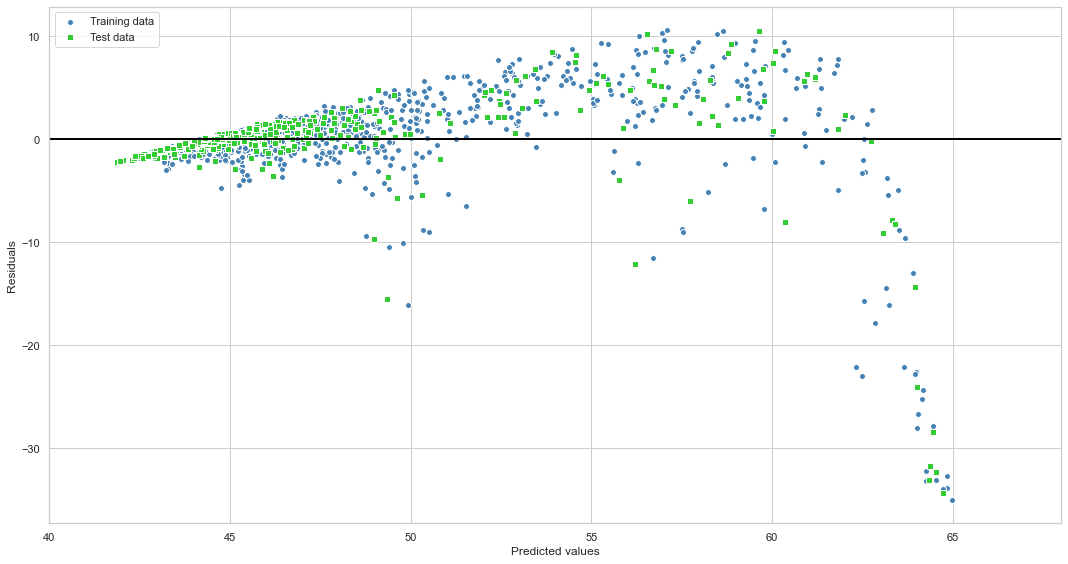

In [14]:
plt.figure(figsize = (15 , 8))

plt.scatter(y_train_pred_Ridge , y_train_pred_Ridge - y_train , c = 'steelblue' , marker = 'o' , edgecolors = 'white' , label = 'Training data')
plt.scatter(y_test_pred_Ridge , y_test_pred_Ridge - y_test , c = 'limegreen' , marker = 's' , edgecolors = 'white' , label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0 , xmin = 0 , xmax = 68 , color = 'black' , lw = 2)
plt.xlim([40 , 68])
plt.tight_layout()
plt.show()

#### Lasso

In [15]:
from sklearn.linear_model import Lasso

Lasso = Lasso()
Lasso.fit(X_train , y_train)

y_train_pred_Lasso = Lasso.predict(X_train)
y_test_pred_Lasso = Lasso.predict(X_test)

print('Lasso.coef_: {}'.format(LR.coef_))
print('Lasso.intercept_: {}'.format(LR.intercept_))

print('-----------------------------------------------')

RMSE_train_Lasso = np.sqrt(mean_squared_error(y_train , y_train_pred_Lasso))
print('Lasso Train RMSE : {}'.format(RMSE_train_Ridge))

R2_train_Lasso = r2_score(y_train , y_train_pred_Lasso)
print('Lasso Train R^2 : {}'.format(R2_train_Ridge))

RMSE_test_Lasso = np.sqrt(mean_squared_error(y_test , y_test_pred_Lasso))
print('Lasso Test RMSE : {}'.format(RMSE_test_Ridge))

R2_test_Lasso = r2_score(y_test , y_test_pred_Lasso)
print('Lasso Test R^2 : {}'.format(R2_test_Ridge))

MAE_Lasso = mean_absolute_error(y_test , y_test_pred_Lasso)
print('Lasso MAE : {}'.format(MAE_Ridge))

Lasso.coef_: [-0.06098747  0.00043304 -0.00014505 -0.00676624  0.00023876 -0.00579273
 -0.00229295 -0.00248125]
Lasso.intercept_: 65.06030557604531
-----------------------------------------------
Lasso Train RMSE : 4.077806764013296
Lasso Train R^2 : 0.5877618275489578
Lasso Test RMSE : 4.7390971136648465
Lasso Test R^2 : 0.5951638879056049
Lasso MAE : 2.1813569242318898


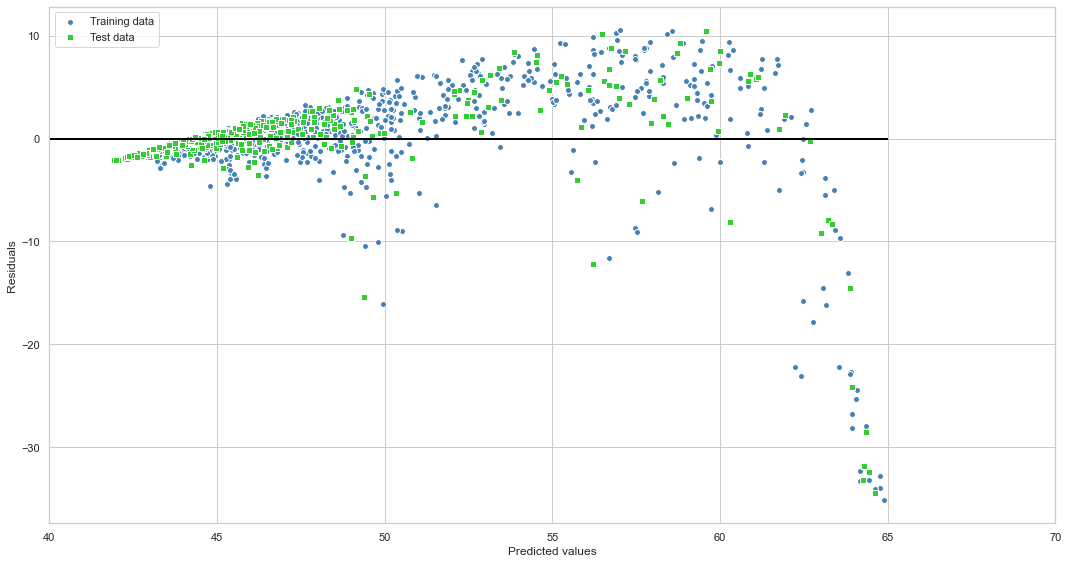

In [16]:
plt.figure(figsize = (15 , 8))

plt.scatter(y_train_pred_Lasso , y_train_pred_Lasso - y_train , c = 'steelblue' , marker = 'o' , edgecolors = 'white' , label = 'Training data')
plt.scatter(y_test_pred_Lasso , y_test_pred_Lasso - y_test , c = 'limegreen' , marker = 's' , edgecolors = 'white' , label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0 , xmin = 0 , xmax = 65 , color = 'black' , lw = 2)
plt.xlim([40 , 70])
plt.tight_layout()
plt.show()

#### Multivariable Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.pipeline import make_pipeline

pr = LinearRegression()

quadratic = PolynomialFeatures(degree = 2) # 2- 17

X_train_pr , X_test_pr , y_train_pr , y_test_pr = train_test_split(X , y , train_size = 0.8 , random_state = 42)
X_train_quad = quadratic.fit_transform(X_train_pr)
X_test_quad = quadratic.fit_transform(X_test_pr)

pr.fit(X_train_quad , y_train_pr)
y_quad_train_pred = pr.predict(X_train_quad)
y_quad_test_pred = pr.predict(X_test_quad)

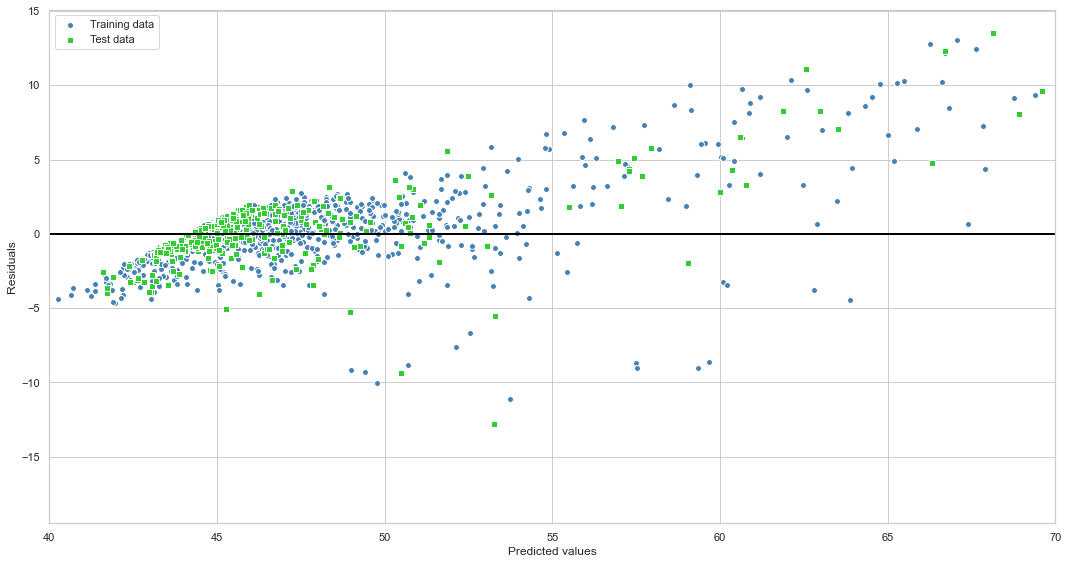

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15 , 8))
plt.scatter(y_quad_train_pred , y_quad_train_pred - y_train_pr , c = 'steelblue' , marker = 'o' , edgecolors = 'white' , label = 'Training data')
plt.scatter(y_quad_test_pred , y_quad_test_pred - y_test_pr , c = 'limegreen' , marker = 's' , edgecolors = 'white' , label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0 , xmin = 40 , xmax = 70 , color = 'black' , lw = 2)
plt.xlim([40 , 70])
plt.tight_layout()
plt.show()

In [19]:
print('pr.coef_: {}'.format(pr.coef_))
print('pr.intercept_: {}'.format(pr.intercept_))

print('-----------------------------------------------')

RMSE_train_pr = np.sqrt(mean_squared_error(y_train_pr , y_quad_train_pred))
print('pr Train RMSE : {}'.format(RMSE_train_pr))

R2_train_pr = r2_score(y_train_pr , y_quad_train_pred)
print('pr Train R^2 : {}'.format(R2_train_pr))

RMSE_test_pr = np.sqrt(mean_squared_error(y_test_pr , y_quad_test_pred))
print('pr Test RMSE : {}'.format(RMSE_test_pr))

R2_test_pr = r2_score(y_test_pr , y_quad_test_pred)
print('pr Test R^2 : {}'.format(R2_test_pr))

MAE_pr = mean_absolute_error(y_test_pr , y_quad_test_pred)
print('pr MAE : {}'.format(MAE_pr))

pr.coef_: [-6.79418597e-15 -2.55878437e-01  1.15067180e-02 -1.06874865e-03
 -4.02707945e-02 -7.92409875e-03 -5.03486546e-02 -2.31694808e-02
 -1.00438591e-02  7.01585381e-04 -8.65897229e-05 -2.55610602e-05
  6.83231886e-05  5.22464927e-05  2.71219190e-05  7.04881470e-05
  3.02786356e-05  3.60444816e-06  2.95158084e-06 -1.05507257e-05
  8.56630066e-07  1.43727068e-05 -6.37021257e-07  6.26217834e-07
  3.03643511e-06  2.03105052e-07 -2.98206847e-06  8.47522829e-06
 -6.92777102e-07  1.27238661e-06  2.45153033e-05 -3.98378516e-06
  1.74939105e-05  8.68183697e-06  6.39591555e-06  2.24162485e-06
 -1.21201980e-05 -2.67319588e-07  1.52338626e-06  8.27109713e-05
 -6.82292918e-06 -9.20956010e-06  6.20463003e-06 -3.28370434e-06
  3.09427682e-06]
pr.intercept_: 83.31193253486015
-----------------------------------------------
pr Train RMSE : 2.8258449003538284
pr Train R^2 : 0.840015660898823
pr Test RMSE : 2.4536878235767223
pr Test R^2 : 0.6400247954260132
pr MAE : 1.5229733451562157


#### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(max_depth = 3)

grid = {'min_samples_split': [5, 10, 20, 50, 100]},

clf_tree = GridSearchCV(tree, grid, cv=5)
clf_tree.fit(X_train , y_train)

pred_train_tree = clf_tree.predict(X_train)
pred_test_tree = clf_tree.predict(X_test)

In [21]:
RMSE_train_tree = np.sqrt(mean_squared_error(y_train , pred_train_tree))
print('Tree Train RMSE : {}'.format(RMSE_train_tree))

R2_train_tree = r2_score(y_train , pred_train_tree)
print('Tree Train R^2 : {}'.format(R2_train_tree))

RMSE_test_tree = np.sqrt(mean_squared_error(y_test , pred_test_tree))
print('Tree Test RMSE : {}'.format(RMSE_test_tree))

R2_test_tree = r2_score(y_test , pred_test_tree)
print('Tree Test R^2 : {}'.format(R2_test_tree))

MAE_tree = mean_absolute_error(y_test , pred_test_tree)
print('Tree MAE : {}'.format(MAE_tree))

Tree Train RMSE : 1.6814397114574158
Tree Train R^2 : 0.9299097642685039
Tree Test RMSE : 2.1843628110273134
Tree Test R^2 : 0.9139922519337875
Tree MAE : 1.1120053083357089


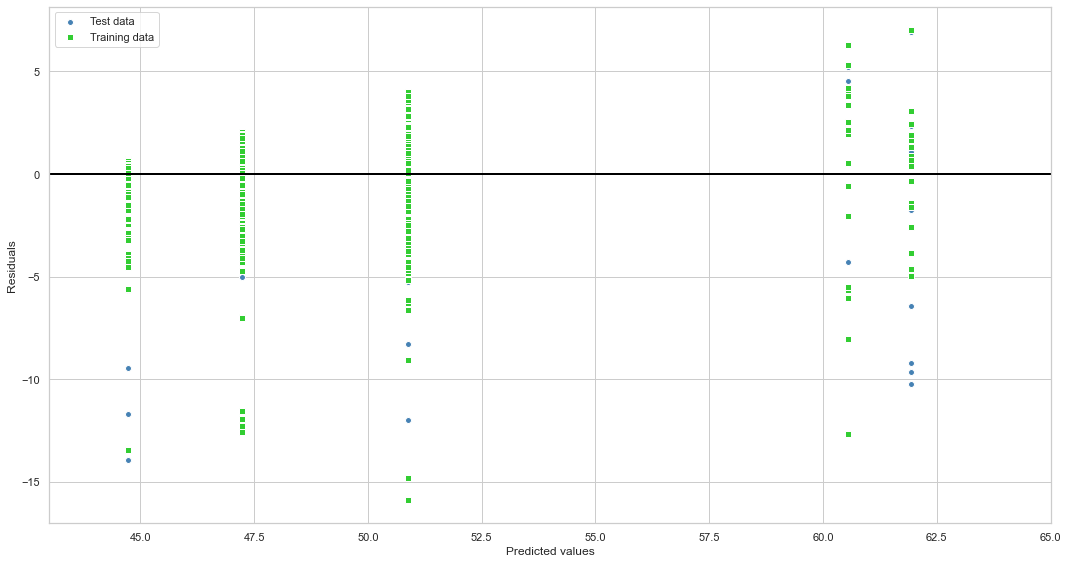

In [22]:
plt.figure(figsize = (15 , 8))

plt.scatter(pred_test_tree , pred_test_tree - y_test , c = 'steelblue' , marker = 'o' , edgecolors = 'white' , label = 'Test data')
plt.scatter(pred_train_tree , pred_train_tree - y_train , c = 'limegreen' , marker = 's' , edgecolors = 'white' , label = 'Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0 , xmin = 0 , xmax = 65 , color = 'black' , lw = 2)
plt.xlim([43 , 65])
plt.tight_layout()
plt.show()

#### RandomForest

In [23]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 1000 , criterion = 'squared_error',random_state = 1 , n_jobs = -1)

RF.fit(X_train , y_train)

y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF = RF.predict(X_test)

In [24]:
RMSE_train_RF = np.sqrt(mean_squared_error(y_train , y_train_pred_RF))
print('RF Train RMSE : {}'.format(RMSE_train_RF))

R2_train_RF = r2_score(y_train , y_train_pred_RF)
print('RF Train R^2 : {}'.format(R2_train_RF))

RMSE_test_RF = np.sqrt(mean_squared_error(y_test , y_test_pred_RF))
print('RF Test RMSE : {}'.format(RMSE_test_RF))

R2_test_RF = r2_score(y_test , y_test_pred_RF)
print('RF Test R^2 : {}'.format(R2_test_RF))

MAE_RF = mean_absolute_error(y_test , y_test_pred_RF)
print('RF MAE : {}'.format(MAE_RF))

RF Train RMSE : 0.25237950697498945
RF Train R^2 : 0.9984209237720671
RF Test RMSE : 0.7094727175911189
RF Test R^2 : 0.9909268220690969
RF MAE : 0.27971405208332456


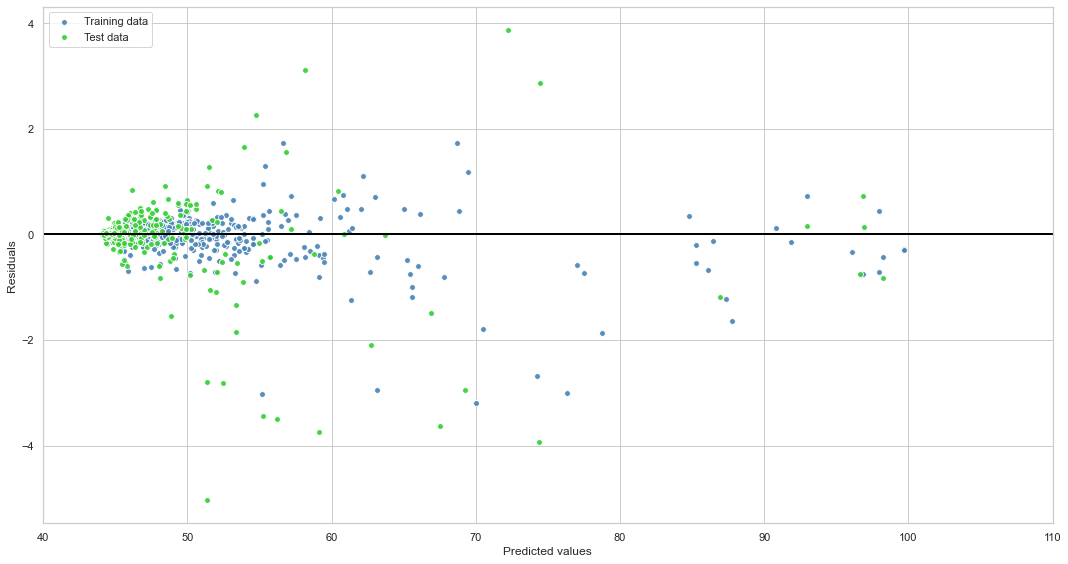

In [25]:
plt.figure(figsize = (15 ,8))

plt.scatter(y_train_pred_RF , y_train_pred_RF - y_train , 
            c = 'steelblue',
           edgecolors = 'white',
           marker = 'o',
           s = 35 ,
           alpha = 0.9 , 
           label = 'Training data')

plt.scatter(y_test_pred_RF , y_test_pred_RF - y_test , 
            c = 'limegreen',
           edgecolors = 'white',
           marker = 'o',
           s = 35 ,
           alpha = 0.9 , 
           label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0 , xmin = 40 , xmax = 110 , color = 'black' , lw = 2)
plt.xlim([40 , 110])
plt.tight_layout()
plt.show()

### Inclusion

In [26]:
df = pd.DataFrame({'Model': ['LR', 'Ridge', 'Lasso','MR' ,'DT' ,'RF'], 
                   'Train RMSE': [RMSE_train, RMSE_train_Ridge, RMSE_train_Lasso , RMSE_train_pr , RMSE_train_tree , RMSE_train_RF], 
                   'Test RMSE': [RMSE_test, RMSE_test_Ridge, RMSE_test_Lasso , RMSE_test_pr , RMSE_test_tree , RMSE_test_RF],
                   'Train R^2': [R2_train, R2_train_Ridge, R2_train_Lasso , R2_train_pr , R2_train_tree , R2_train_RF],
                   'Test R^2': [R2_test, R2_test_Ridge, R2_test_Lasso , R2_test_pr , R2_test_tree , R2_test_RF],
                   'MAE': [MAE, MAE_Ridge, MAE_Lasso ,MAE_pr , MAE_tree , MAE_RF]})

In [27]:
df

,Model,Train RMSE,Test RMSE,Train R^2,Test R^2,MAE
0,LR,4.077807,4.739097,0.587762,0.595164,2.181357
1,Ridge,4.077807,4.739097,0.587762,0.595164,2.181357
2,Lasso,4.077957,4.741963,0.587731,0.594674,2.176355
3,MR,2.825845,2.453688,0.840016,0.640025,1.522973
4,DT,1.681440,2.184363,0.929910,0.913992,1.112005
5,RF,0.252380,0.709473,0.998421,0.990927,0.279714


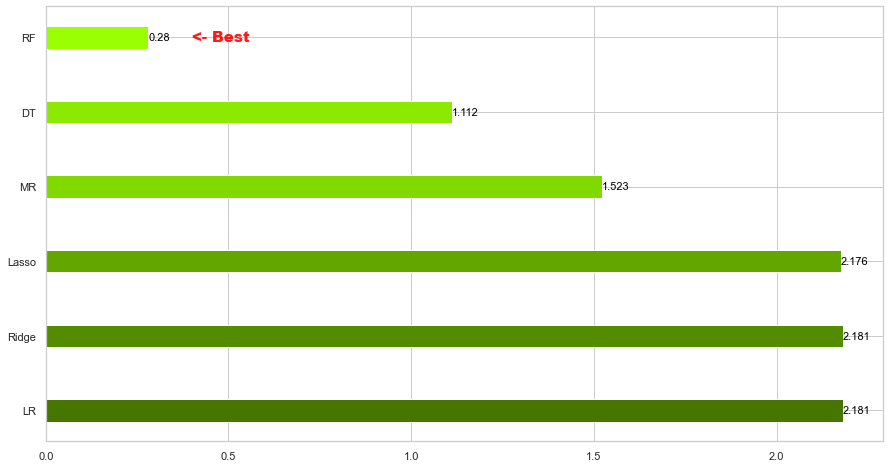

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15 ,8))
colors = ["#467500", "#548C00", "#64A600", "#82D900", 
          "#8CEA00", "#9AFF02"]
plt.barh(df['Model'],df['MAE'],tick_label = df['Model'] ,
        height = 0.3 , color = colors)
plt.text(0.4 , 4.95 , '<- Best' , alpha = 0.9 , color = 'red' ,size = 15 , weight = 'heavy')
for a, b in zip(list(round(df['MAE'] ,3)), df['Model']):
	plt.text(a, b , a, ha='left', va='center', fontsize = 11 ,color = 'black')
ax.set(xlabel = "MAE (SMALLER IS BETTER)",ylabel = "Model")
plt.show()